In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
sns.set()

In [2]:
# set this to your local analysis ID
ANALYSIS_ID = 'ee1ef0c1a73b4a08a5a352838d83896d'

The DES data vector is `[src-src, lens-src, lens-lens]` where
all unique combinations are kept except that only the diagonal `lens-lens` combinations are kept.

In [3]:
n_src = 4
n_lens = 5

# Plot the Redshift Distributions

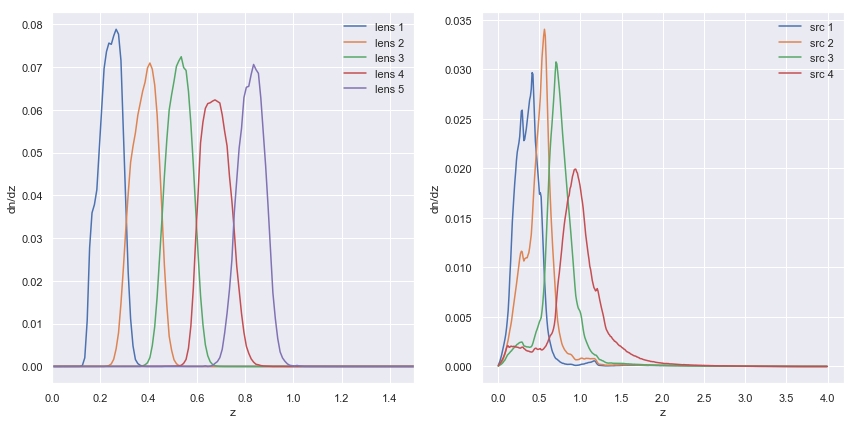

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax = axs[0]
for i in range(1, n_lens+1):
    df = pd.read_csv('./des_data/dndz_lens%d.csv' % i)
    df['dndz'] /= np.sum(df['dndz'])
    ax.plot(df['z'], df['dndz'], label='lens %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)
ax.set_xlim(0.0, 1.5)

ax = axs[1]
for i in range(1, n_src+1):
    df = pd.read_csv('./des_data/dndz_src%d.csv' % i)
    df['dndz'] /= np.sum(df['dndz'])
    ax.plot(df['z'], df['dndz'], label='src %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)

plt.tight_layout()

# Compare Firecrown to the DES Data for Cosmic Shear

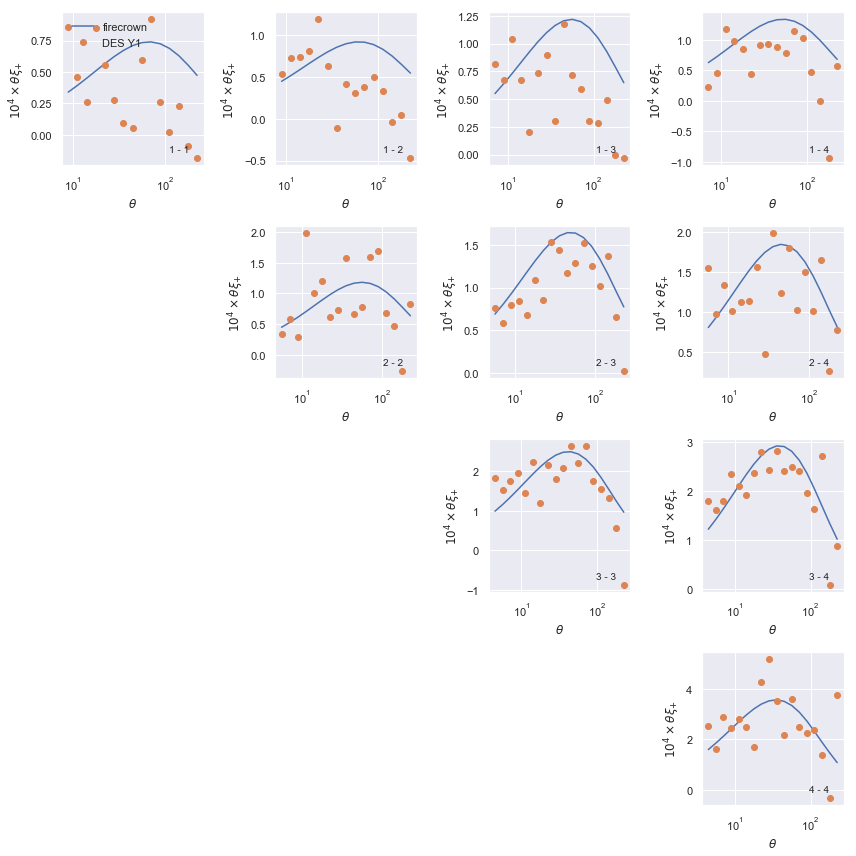

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(1, n_src+1):
    for j in range(1, n_src+1):
        # skip extra plots
        if i > j:
            axs[i-1, j-1].axis('off')
            continue
        
        # read in the firecrown
        xip_data = pd.read_csv('output_%s/two_point/xip_src%d_src%d.csv' % (
            ANALYSIS_ID, i, j))
        ax = axs[i-1, j-1]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * xip_data['ell_or_theta'].array.to_numpy()
        
        # firecrown
        ax.semilogx(
            xip_data['ell_or_theta'], 
            fac * xip_data['predicted_statistic'].array.to_numpy(), 
            label='firecrown')
        
        # des
        ax.semilogx(
            xip_data['ell_or_theta'], 
            fac * xip_data['measured_statistic'].array.to_numpy(), 
            'o',
            label='DES Y1')
        
        if i == 1 and j == 1:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{+}$')
            
plt.tight_layout()

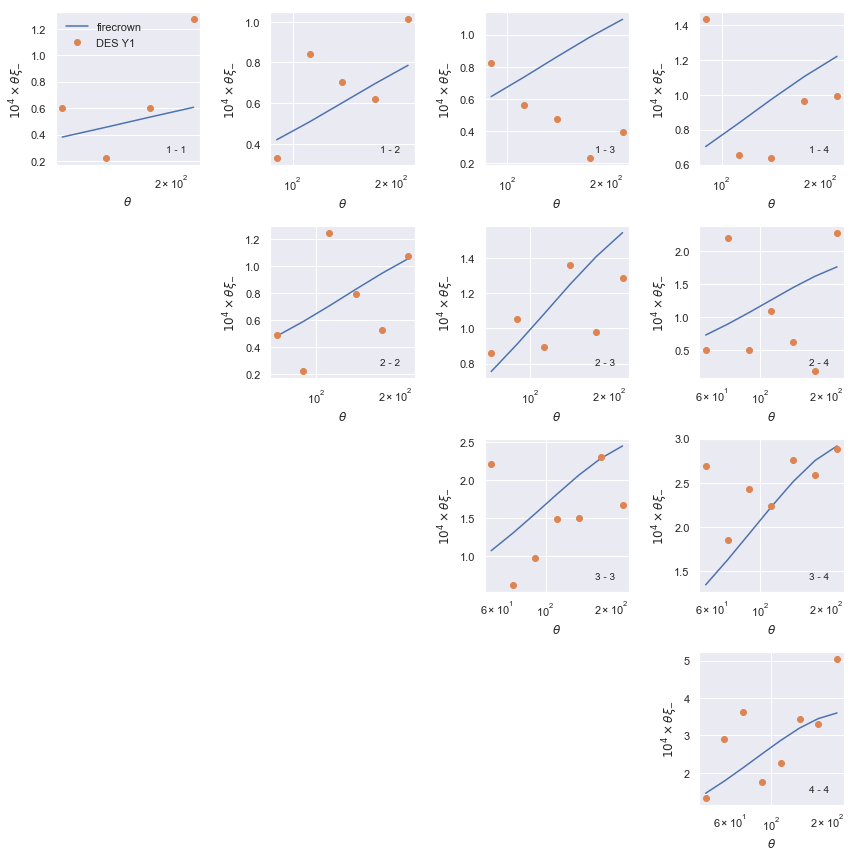

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(1, n_src+1):
    for j in range(1, n_src+1):
        # skip extra plots
        if i > j:
            axs[i-1, j-1].axis('off')
            continue
        
        # read in the firecrown
        xim_data = pd.read_csv('output_%s/two_point/xim_src%d_src%d.csv' % (
            ANALYSIS_ID, i, j))
        ax = axs[i-1, j-1]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * xim_data['ell_or_theta'].array.to_numpy()
        
        # firecrown
        ax.semilogx(
            xim_data['ell_or_theta'], 
            fac * xim_data['predicted_statistic'].array.to_numpy(), 
            label='firecrown')
        
        # des
        ax.semilogx(
            xim_data['ell_or_theta'], 
            fac * xim_data['measured_statistic'].array.to_numpy(), 
            'o',
            label='DES Y1')
        
        if i == 1 and j == 1:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{-}$')
            
plt.tight_layout()

# Compare Firecrown to DES Data for GG Lensing

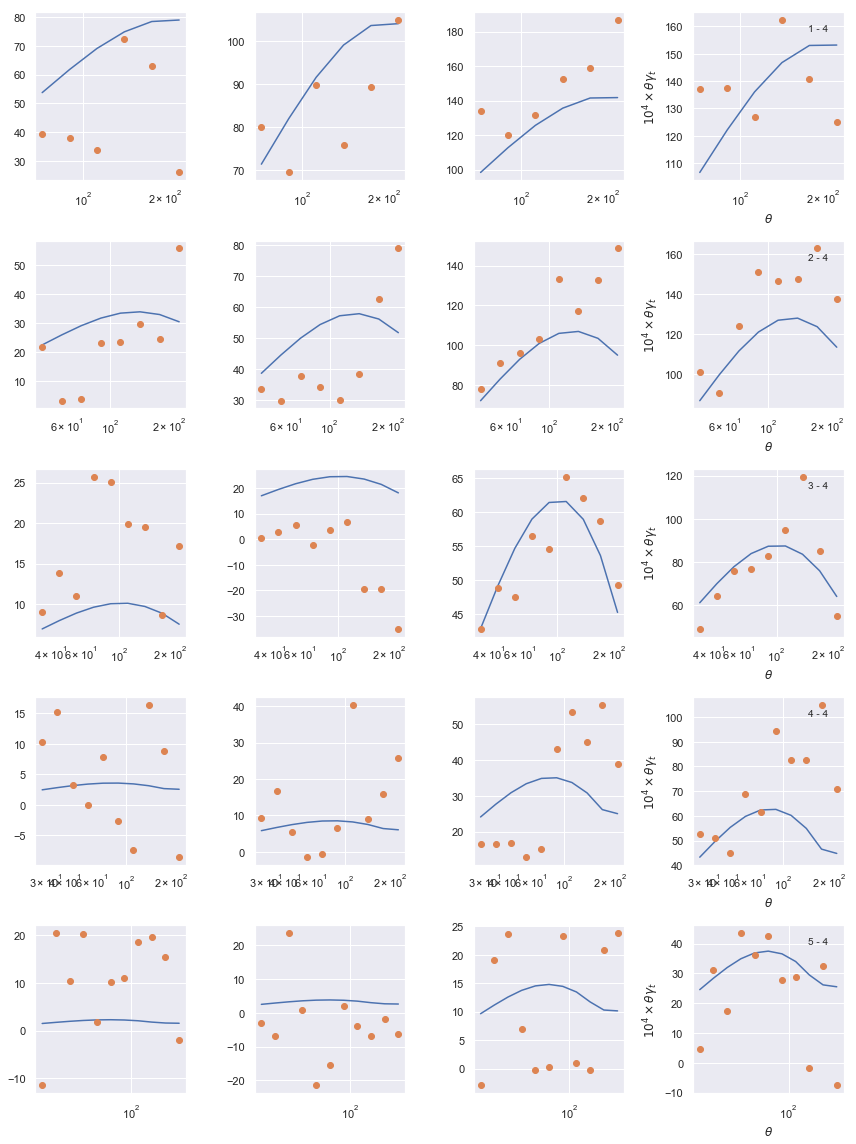

In [7]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 16))

for lensi in range(1, n_lens+1):
    for srcj in range(1, n_src+1):
        ax = axs[lensi-1, srcj-1]

        # read in the firecrown
        data = pd.read_csv('output_%s/two_point/gammat_lens%d_src%d.csv' % (
            ANALYSIS_ID, lensi, srcj))
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * data['ell_or_theta'].array.to_numpy()
        
        # firecrown
        ax.semilogx(
            data['ell_or_theta'], 
            fac * data['predicted_statistic'].array.to_numpy(),
            label='firecrown')
        
        ax.semilogx(
            data['ell_or_theta'], 
            fac * data['measured_statistic'],
            'o',
            label='SRD v1')
    
    if lensi == 1 and srcj == 1:
        ax.legend(loc=3, frameon=False)
        
    ax.text(
        0.9, 0.9, '%d - %d' % (lensi, srcj), 
        horizontalalignment='right',
        verticalalignment='center', 
        transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta\gamma_{t}$')
            
plt.tight_layout()

# Compare Firecrown to DES Data for Clustering

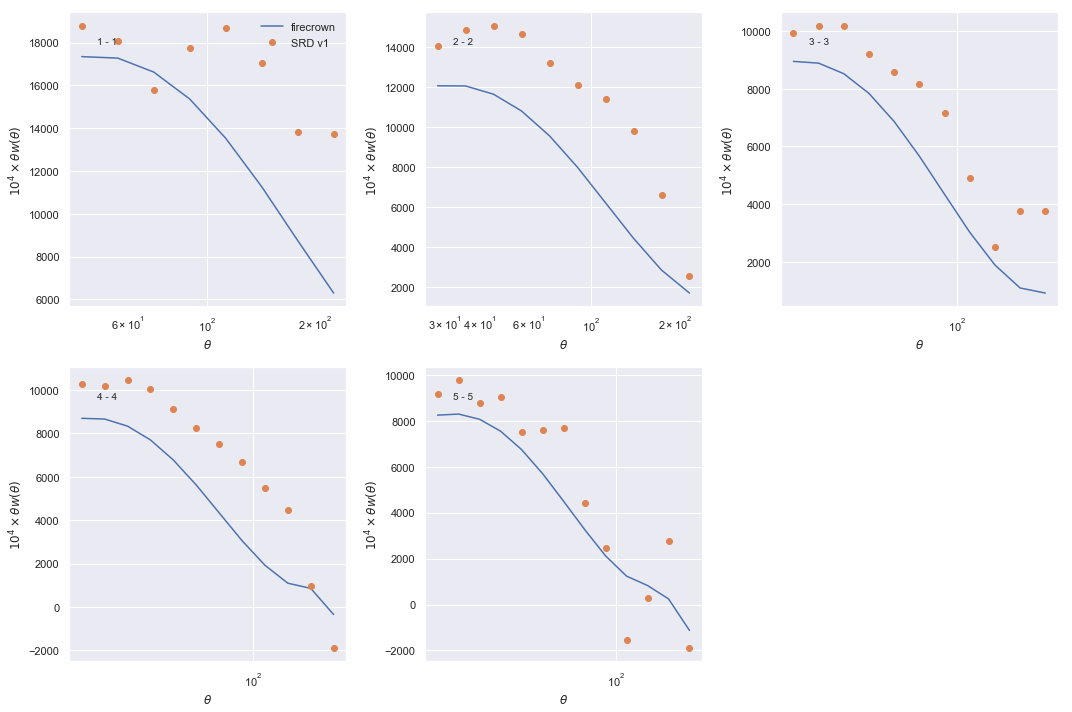

In [8]:
# get loc excluding cosmic shear and gg lensing
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.ravel()
axs[-1].axis('off')
for i in range(1, n_lens+1):
    ax = axs[i-1]

    # read in the SRD values
    data = pd.read_csv('output_%s/two_point/wtheta_lens%d_lens%d.csv' % (
        ANALYSIS_ID, i, i))
        
    # this is a factor of 10^4 x theta to take out the dynamic range
    ell = data['ell_or_theta'].array.to_numpy()
    fac = 1e4 * ell
        
    # firecrown
    ax.semilogx(
        ell, 
        (fac * data['predicted_statistic'].array.to_numpy()),
        label='firecrown')
        
    # grab the right section of the SRD model
    ax.semilogx(
        ell, 
        (fac * data['measured_statistic'].array.to_numpy()), 
        'o',
        label='SRD v1')
    
    if i == 1:
        ax.legend(loc=1, frameon=False)
        
    ax.text(
        0.1, 0.9, '%d - %d' % (i, i), 
        horizontalalignment='left',
        verticalalignment='center', 
        transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta w(\theta)$')
            
plt.tight_layout()